## Analogtivation

In [1]:
import keras
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import time
from time import gmtime, strftime

from math import tan, radians
import random
import json

Using TensorFlow backend.
/Users/_Turing/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
# set seeds
seed_value = 42

random.seed(seed_value)
np.random.seed(seed_value)
tf.set_random_seed(seed_value)

### Building a clock

Current Time: 18:18:13


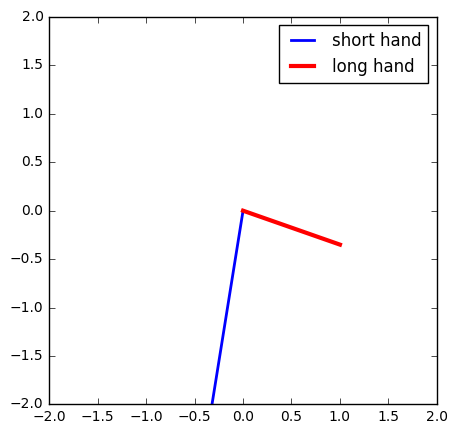

In [3]:
current_time = gmtime()
    
hour   = int(strftime("%H", current_time))
minute = int(strftime("%M", current_time))
second = int(strftime("%S", current_time))
    
# clock starts at 12 (90 degrees) and moves clock-wise
def to_clock_angle(theta):
    return -1 * (theta - 90)
    
exact_hour   = hour%12 + minute/60 + second/(60*60)
exact_minute = minute  + second/60
    
short_hand_angle = to_clock_angle(360 * exact_hour/12)
long_hand_angle  = to_clock_angle(360 * exact_minute/60)

# hand of clock is linear function where slope is equal to tan(angle)
def short_hand(x):
    return tan(radians(short_hand_angle)) * x
def long_hand(x):
    return tan(radians(long_hand_angle)) * x

# plot clock
x_neg = np.linspace(-1, 0, 2)
x_pos = np.linspace(0,  1, 2)

print("Current Time: {}:{}:{}".format(hour, minute, second))
plt.figure(figsize=(5, 5)) 
plt.plot(x_pos             * (exact_hour   < 6.0)  + x_neg             * (exact_hour   >= 6.0), 
         short_hand(x_pos) * (exact_hour   < 6.0)  + short_hand(x_neg) * (exact_hour   >= 6.0),  
         label = "short hand", linewidth = 2, color = "blue")
plt.plot(x_pos             * (exact_minute < 30.0) + x_neg             * (exact_minute >= 30.0), 
         long_hand(x_pos)  * (exact_minute < 30.0) + long_hand(x_neg)  * (exact_minute >= 30.0), 
         label = "long hand",  linewidth = 3, color = "red")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.legend()
plt.show()

### The activation function

In [4]:
def my_activation(x):
    
    # get current time
    global current_time
    current_time = gmtime()
    
    hour   = int(strftime("%H", current_time))
    minute = int(strftime("%M", current_time))
    second = int(strftime("%S", current_time))
    
    # clock hands
    hour_hand_angle = (hour%12 + minute/60 + second/(60*60)) * 360/12
    hour_hand = tan(radians(to_clock_angle(short_hand_angle)))
    
    minute_hand_angle  = (minute  + second/60) * 360/60
    minute_hand  = tan(radians(to_clock_angle(long_hand_angle)))
    
    # which clock hand do I use?
    above_threshold = minute_hand_angle * x * K.cast(x >= 0.0, "float32") # minute hand for positive
    below_threshold = hour_hand_angle * x * K.cast(x < 0.0, "float32")    # hour hand for negative

    return below_threshold + above_threshold

### Load MNIST Data Set

In [5]:
# Load data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train.reshape(60000, 28*28).astype('float32') / 255
X_test  = X_test.reshape(10000, 28*28).astype('float32') / 255

y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test  = keras.utils.np_utils.to_categorical(y_test, 10)

### Train model

In [6]:
iteration = 1

# run model 24 times
while(iteration < 25):

    # wait 30 minutes
    time.sleep(30 * 60)
    
    # Save the current time at the beginning of every epoch.
    json_log = open('logs/log_'+str(iteration)+'.json', mode='w', buffering=1)
    json_logging_callback = keras.callbacks.LambdaCallback(
        on_epoch_end=lambda epoch, logs: json_log.write(
            json.dumps({'epoch': epoch, 
                        'loss': logs.get('loss'), 
                        'val_loss': logs.get('val_loss'), 
                        'time': strftime("%H:%M:%S", gmtime())}) + '\n'),
        on_train_end=lambda logs: json_log.close()
    )
    
    # Build model
    model = keras.models.Sequential([
        keras.layers.Dense(32, input_shape=(784,), activation = my_activation),
        keras.layers.Dense(10, activation = 'softmax')
    ])

    model.compile(loss = 'categorical_crossentropy', optimizer = 'nadam')

    hist = model.fit(X_train, y_train, 
                     batch_size = 128, epochs = 50, 
                     verbose = 2, validation_data = (X_test, y_test),
                     callbacks = [json_logging_callback])
    
    iteration += 1

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 1s - loss: 9.4168 - val_loss: 8.7270
Epoch 2/50
 - 1s - loss: 8.3236 - val_loss: 8.0119
Epoch 3/50
 - 1s - loss: 7.8107 - val_loss: 7.7307
Epoch 4/50
 - 1s - loss: 7.6049 - val_loss: 7.5225
Epoch 5/50
 - 1s - loss: 7.6023 - val_loss: 7.4979
Epoch 6/50
 - 1s - loss: 7.5947 - val_loss: 7.5510
Epoch 7/50
 - 1s - loss: 7.5599 - val_loss: 7.5853
Epoch 8/50
 - 1s - loss: 7.6421 - val_loss: 7.4689
Epoch 9/50
 - 1s - loss: 7.5385 - val_loss: 7.5951
Epoch 10/50
 - 1s - loss: 7.5413 - val_loss: 7.3915
Epoch 11/50
 - 1s - loss: 7.5852 - val_loss: 7.5797
Epoch 12/50
 - 1s - loss: 7.5323 - val_loss: 7.4218
Epoch 13/50
 - 1s - loss: 7.5667 - val_loss: 7.5611
Epoch 14/50
 - 1s - loss: 7.5885 - val_loss: 7.8055
Epoch 15/50
 - 1s - loss: 7.6087 - val_loss: 7.4537
Epoch 16/50
 - 1s - loss: 7.4968 - val_loss: 7.4520
Epoch 17/50
 - 1s - loss: 7.5026 - val_loss: 7.9368
Epoch 18/50
 - 1s - loss: 7.6887 - val_loss: 7.3415
Epoch 19/50
 - 1s - los

Epoch 4/50
 - 1s - loss: 7.0416 - val_loss: 7.0732
Epoch 5/50
 - 1s - loss: 6.4536 - val_loss: 5.9594
Epoch 6/50
 - 1s - loss: 6.1205 - val_loss: 6.0627
Epoch 7/50
 - 1s - loss: 6.0885 - val_loss: 6.1645
Epoch 8/50
 - 1s - loss: 5.9908 - val_loss: 5.7471
Epoch 9/50
 - 1s - loss: 6.0489 - val_loss: 5.9215
Epoch 10/50
 - 1s - loss: 5.9923 - val_loss: 5.7329
Epoch 11/50
 - 1s - loss: 5.9142 - val_loss: 5.8615
Epoch 12/50
 - 1s - loss: 5.9476 - val_loss: 5.8568
Epoch 13/50
 - 1s - loss: 5.9187 - val_loss: 5.8690
Epoch 14/50
 - 1s - loss: 5.9379 - val_loss: 5.8959
Epoch 15/50
 - 1s - loss: 6.0266 - val_loss: 5.8514
Epoch 16/50
 - 1s - loss: 5.9193 - val_loss: 5.8719
Epoch 17/50
 - 1s - loss: 5.8761 - val_loss: 5.8724
Epoch 18/50
 - 1s - loss: 5.9883 - val_loss: 5.9116
Epoch 19/50
 - 1s - loss: 5.9037 - val_loss: 5.6924
Epoch 20/50
 - 1s - loss: 5.9497 - val_loss: 5.9677
Epoch 21/50
 - 1s - loss: 5.8392 - val_loss: 5.6834
Epoch 22/50
 - 1s - loss: 5.9665 - val_loss: 5.7213
Epoch 23/50
 - 1s 

 - 1s - loss: 7.5143 - val_loss: 7.5130
Epoch 10/50
 - 1s - loss: 7.6159 - val_loss: 7.3088
Epoch 11/50
 - 1s - loss: 7.5019 - val_loss: 7.2018
Epoch 12/50
 - 1s - loss: 7.4155 - val_loss: 7.2123
Epoch 13/50
 - 1s - loss: 7.2914 - val_loss: 7.0734
Epoch 14/50
 - 1s - loss: 7.3780 - val_loss: 7.4518
Epoch 15/50
 - 1s - loss: 7.4517 - val_loss: 7.0484
Epoch 16/50
 - 1s - loss: 7.3127 - val_loss: 7.1448
Epoch 17/50
 - 1s - loss: 7.4124 - val_loss: 7.5481
Epoch 18/50
 - 1s - loss: 7.5577 - val_loss: 7.2851
Epoch 19/50
 - 1s - loss: 7.5035 - val_loss: 7.1947
Epoch 20/50
 - 1s - loss: 7.7666 - val_loss: 6.5643
Epoch 21/50
 - 1s - loss: 6.6511 - val_loss: 6.2368
Epoch 22/50
 - 1s - loss: 6.5559 - val_loss: 6.3707
Epoch 23/50
 - 1s - loss: 6.4839 - val_loss: 6.0776
Epoch 24/50
 - 1s - loss: 6.3815 - val_loss: 6.2017
Epoch 25/50
 - 1s - loss: 6.1982 - val_loss: 6.1761
Epoch 26/50
 - 1s - loss: 6.1928 - val_loss: 6.1143
Epoch 27/50
 - 1s - loss: 6.2783 - val_loss: 5.9666
Epoch 28/50
 - 1s - loss

Epoch 13/50
 - 1s - loss: 8.7176 - val_loss: 8.7967
Epoch 14/50
 - 1s - loss: 8.7656 - val_loss: 8.9507
Epoch 15/50
 - 1s - loss: 8.7068 - val_loss: 8.7900
Epoch 16/50
 - 1s - loss: 8.6544 - val_loss: 8.5374
Epoch 17/50
 - 1s - loss: 8.6476 - val_loss: 8.5017
Epoch 18/50
 - 1s - loss: 8.6197 - val_loss: 8.6071
Epoch 19/50
 - 1s - loss: 8.6909 - val_loss: 8.6260
Epoch 20/50
 - 1s - loss: 8.6910 - val_loss: 8.8034
Epoch 21/50
 - 1s - loss: 8.6443 - val_loss: 8.4243
Epoch 22/50
 - 1s - loss: 8.5240 - val_loss: 8.4533
Epoch 23/50
 - 1s - loss: 8.5148 - val_loss: 8.5711
Epoch 24/50
 - 1s - loss: 8.6379 - val_loss: 8.5762
Epoch 25/50
 - 1s - loss: 8.8206 - val_loss: 8.6806
Epoch 26/50
 - 1s - loss: 8.6781 - val_loss: 8.5242
Epoch 27/50
 - 1s - loss: 8.7279 - val_loss: 8.4770
Epoch 28/50
 - 1s - loss: 8.5727 - val_loss: 8.5648
Epoch 29/50
 - 1s - loss: 8.6356 - val_loss: 8.5265
Epoch 30/50
 - 1s - loss: 8.5877 - val_loss: 8.5330
Epoch 31/50
 - 1s - loss: 8.6086 - val_loss: 8.5058
Epoch 32/50


 - 1s - loss: 6.8248 - val_loss: 6.7317
Epoch 19/50
 - 1s - loss: 6.8273 - val_loss: 6.7167
Epoch 20/50
 - 1s - loss: 6.8461 - val_loss: 6.7059
Epoch 21/50
 - 1s - loss: 6.8522 - val_loss: 6.7335
Epoch 22/50
 - 1s - loss: 6.4754 - val_loss: 5.4832
Epoch 23/50
 - 1s - loss: 5.5476 - val_loss: 5.3632
Epoch 24/50
 - 1s - loss: 5.4909 - val_loss: 5.4111
Epoch 25/50
 - 1s - loss: 5.4484 - val_loss: 5.2385
Epoch 26/50
 - 1s - loss: 5.3725 - val_loss: 5.4785
Epoch 27/50
 - 1s - loss: 5.4366 - val_loss: 5.1740
Epoch 28/50
 - 1s - loss: 5.3141 - val_loss: 5.1609
Epoch 29/50
 - 1s - loss: 5.2941 - val_loss: 5.2985
Epoch 30/50
 - 1s - loss: 5.3701 - val_loss: 5.2190
Epoch 31/50
 - 1s - loss: 5.2669 - val_loss: 5.1949
Epoch 32/50
 - 1s - loss: 5.2681 - val_loss: 5.2427
Epoch 33/50
 - 1s - loss: 5.3295 - val_loss: 5.2341
Epoch 34/50
 - 1s - loss: 5.2917 - val_loss: 5.1811
Epoch 35/50
 - 1s - loss: 5.3905 - val_loss: 5.1763
Epoch 36/50
 - 1s - loss: 5.2943 - val_loss: 5.1390
Epoch 37/50
 - 1s - loss

Epoch 24/50
 - 1s - loss: 4.1218 - val_loss: 4.0172
Epoch 25/50
 - 1s - loss: 4.1685 - val_loss: 4.1838
Epoch 26/50
 - 1s - loss: 4.0898 - val_loss: 3.9381
Epoch 27/50
 - 1s - loss: 4.0473 - val_loss: 4.0407
Epoch 28/50
 - 1s - loss: 4.0967 - val_loss: 4.0810
Epoch 29/50
 - 1s - loss: 4.1000 - val_loss: 3.9559
Epoch 30/50
 - 1s - loss: 4.1298 - val_loss: 4.1643
Epoch 31/50
 - 1s - loss: 4.1462 - val_loss: 3.9991
Epoch 32/50
 - 1s - loss: 4.1024 - val_loss: 3.9960
Epoch 33/50
 - 1s - loss: 4.1025 - val_loss: 3.9691
Epoch 34/50
 - 1s - loss: 4.0683 - val_loss: 4.0145
Epoch 35/50
 - 1s - loss: 4.0692 - val_loss: 3.9867
Epoch 36/50
 - 1s - loss: 4.0523 - val_loss: 3.9106
Epoch 37/50
 - 1s - loss: 4.0497 - val_loss: 3.9842
Epoch 38/50
 - 1s - loss: 4.1267 - val_loss: 4.0393
Epoch 39/50
 - 1s - loss: 4.1129 - val_loss: 3.9171
Epoch 40/50
 - 1s - loss: 4.1058 - val_loss: 4.0506
Epoch 41/50
 - 1s - loss: 4.1039 - val_loss: 3.8547
Epoch 42/50
 - 1s - loss: 4.0925 - val_loss: 3.9404
Epoch 43/50


 - 1s - loss: 2.0487 - val_loss: 1.6782
Epoch 30/50
 - 1s - loss: 1.7792 - val_loss: 1.7550
Epoch 31/50
 - 1s - loss: 1.8320 - val_loss: 2.1420
Epoch 32/50
 - 1s - loss: 1.7774 - val_loss: 1.7581
Epoch 33/50
 - 1s - loss: 1.7019 - val_loss: 1.6255
Epoch 34/50
 - 1s - loss: 1.8952 - val_loss: 1.5725
Epoch 35/50
 - 1s - loss: 1.7085 - val_loss: 1.5543
Epoch 36/50
 - 1s - loss: 1.7147 - val_loss: 1.7254
Epoch 37/50
 - 1s - loss: 1.8300 - val_loss: 1.7758
Epoch 38/50
 - 1s - loss: 1.6669 - val_loss: 1.5676
Epoch 39/50
 - 1s - loss: 1.5880 - val_loss: 1.4487
Epoch 40/50
 - 1s - loss: 1.8264 - val_loss: 1.5120
Epoch 41/50
 - 1s - loss: 1.6199 - val_loss: 1.6055
Epoch 42/50
 - 1s - loss: 1.8135 - val_loss: 1.7084
Epoch 43/50
 - 1s - loss: 1.7342 - val_loss: 1.7565
Epoch 44/50
 - 1s - loss: 1.6973 - val_loss: 1.9145
Epoch 45/50
 - 1s - loss: 1.7455 - val_loss: 1.5306
Epoch 46/50
 - 1s - loss: 1.6764 - val_loss: 1.5635
Epoch 47/50
 - 1s - loss: 1.7891 - val_loss: 1.5631
Epoch 48/50
 - 1s - loss

Epoch 35/50
 - 1s - loss: 4.0499 - val_loss: 4.1441
Epoch 36/50
 - 1s - loss: 4.1269 - val_loss: 3.9380
Epoch 37/50
 - 1s - loss: 4.0638 - val_loss: 4.1096
Epoch 38/50
 - 1s - loss: 4.1912 - val_loss: 4.1425
Epoch 39/50
 - 1s - loss: 4.1035 - val_loss: 3.9580
Epoch 40/50
 - 1s - loss: 4.0506 - val_loss: 3.9352
Epoch 41/50
 - 1s - loss: 4.0843 - val_loss: 3.9161
Epoch 42/50
 - 1s - loss: 4.0026 - val_loss: 4.0363
Epoch 43/50
 - 1s - loss: 3.9980 - val_loss: 3.9332
Epoch 44/50
 - 1s - loss: 4.0803 - val_loss: 4.0746
Epoch 45/50
 - 1s - loss: 4.1294 - val_loss: 4.2724
Epoch 46/50
 - 1s - loss: 4.3757 - val_loss: 4.3795
Epoch 47/50
 - 1s - loss: 4.1487 - val_loss: 4.1971
Epoch 48/50
 - 1s - loss: 4.1433 - val_loss: 4.1530
Epoch 49/50
 - 1s - loss: 4.0968 - val_loss: 3.9756
Epoch 50/50
 - 1s - loss: 4.1020 - val_loss: 4.0900
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 2s - loss: 5.0358 - val_loss: 2.9700
Epoch 2/50
 - 1s - loss: 1.6468 - val_loss: 1.3339
Epoch 3/50
 - 1s